In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,classification_report
# from sklearn.neural_network import MLPClassifier
# from xgboost.sklearn import XGBClassifier #XGBoost has the tendency to fill in the missing values.
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# from sklearn.externals import joblib

df = pd.read_csv('credit_train.csv')
df.head()

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(font_scale = 2)

from sklearn.model_selection import train_test_split

# Data Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null int64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null int64
Number of Credit Problems       100000 non-null int64
Current Credit Balance          100000 non-null int64
Maximum Open 

# Feature Selection

Feature Selection:
    Features with a high percentage of missing values
    Collinear (highly correlated) features
    Features with zero importance in a tree-based model
    Features with low importance
    Features with a single unique value

1: drop uninmportant columns

In [4]:
df.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [5]:
df.shape

(100000, 17)

2: dealing with missing values

In [6]:
#create a dataframe that shows the missing values and % of missing values in each column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53141,53.1
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [7]:
df.drop(columns = 'Months since last delinquent', axis=1, inplace=True) #drop months since last deliquent
df.drop(df.tail(514).index, inplace=True) # drop last 514 rows

In [8]:
for i in df['Maximum Open Credit'][df['Maximum Open Credit'].isnull() == True].index:
    df.drop(labels=i, inplace=True)# drop missing values in Maximum Open Credit

In [9]:
df.drop(columns = 'Number of Open Accounts', axis=1, inplace=True)#drop columns
df.drop(columns = 'Current Credit Balance', axis=1, inplace=True)

In [10]:
for i in df['Bankruptcies'][df['Bankruptcies'].isnull() == True].index:
    df.drop(labels=i, inplace=True)#drop missing values in Bankruptcies

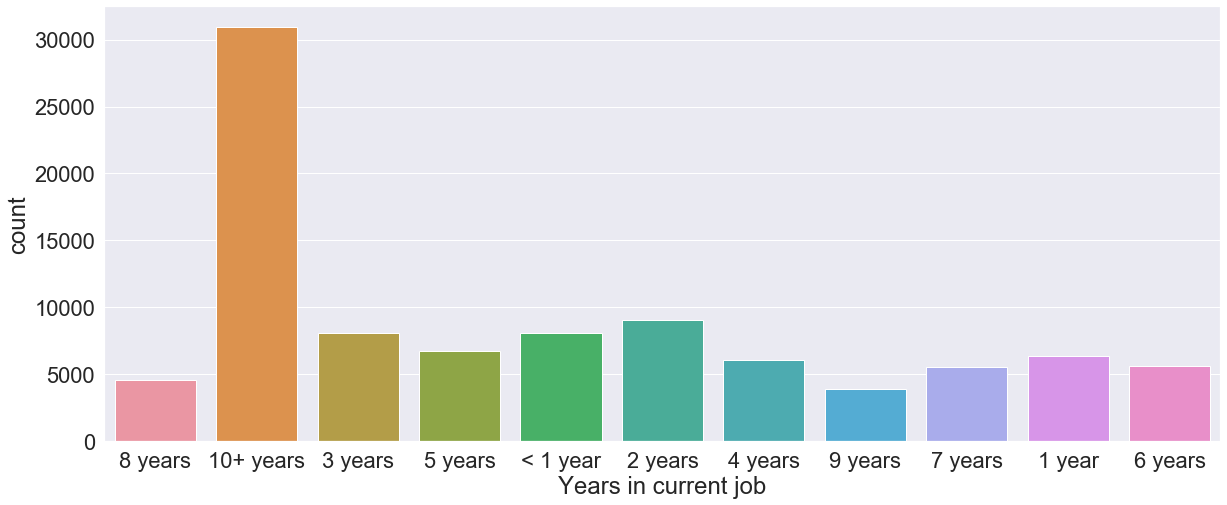

In [11]:
#count of each number of year in the job 
plt.figure(figsize=(20,8))
sns.countplot(df['Years in current job'])

In [12]:
 df.fillna(df.mean(), inplace=True)

In [13]:
df['Years in current job'].fillna('10+ years', inplace=True) # fill with '10+ years'.
# Weight = data['Weight']
# median = Weight.median()
# print(median)
# Weight.fillna(median,inplace = True)

months dropped: months since last deliquent, Number of Open Accounts, Current Credit Balance

In [14]:
missing_values_table(df)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [15]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Credit Problems,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,1,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,1077.107141,1.378189e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,0,850784.0,0.0,0.0
2,Fully Paid,99999999,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,1,750090.0,0.0,0.0
3,Fully Paid,347666,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,0,386958.0,0.0,0.0
4,Fully Paid,176220,Short Term,1077.107141,1.378189e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,0,427174.0,0.0,0.0


In [16]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Credit Problems',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

3: dealing with categorical data 

In [17]:
#make a column for each categorical data
# Select the categorical columns
categorical_subset = df[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

df.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
df = pd.concat([df, categorical_subset], axis = 1)


In [18]:
df

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Credit Problems,Maximum Open Credit,Bankruptcies,Tax Liens,...,Purpose_Home Improvements,Purpose_Major Purchase,Purpose_Medical Bills,Purpose_Moving,Purpose_Other,Purpose_Renewable Energy,Purpose_Small Business,Purpose_Take a Trip,Purpose_Vacation,Purpose_Wedding
0,Fully Paid,445412,709.000000,1.167493e+06,5214.74,17.2,1,416746.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,Fully Paid,262328,1077.107141,1.378189e+06,33295.98,21.1,0,850784.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Fully Paid,99999999,741.000000,2.231892e+06,29200.53,14.9,1,750090.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Fully Paid,347666,721.000000,8.069490e+05,8741.90,12.0,0,386958.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Fully Paid,176220,1077.107141,1.378189e+06,20639.70,6.1,0,427174.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99481,Charged Off,464354,1077.107141,1.378189e+06,14984.73,18.5,0,331760.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
99482,Fully Paid,170610,1077.107141,1.378189e+06,14230.24,8.5,0,192874.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
99483,Charged Off,369446,742.000000,1.313774e+06,28136.72,14.1,0,1365518.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
99484,Fully Paid,342474,731.000000,1.230440e+06,5362.56,18.2,1,634370.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


4: dealing with collinear features

In [19]:
# #  Remove Collinear Features

def remove_collinear_features(x, threshold):
    '''
    Definition:
        Collinear features are features that are highly correlated with one another. 
        In machine learning, these lead to decreased generalization performance on 
        the test set due to high variance and less model interpretability.
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            #if correlation is too high these lead to decreased 
            #generalization performance on the test set
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['Loan Status'] = y
               
    return x
df = remove_collinear_features(df, 0.6);

In [20]:
df.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Credit Problems,Maximum Open Credit,Tax Liens,Term_Long Term,Term_Short Term,...,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Major Purchase,Purpose_Medical Bills,Purpose_Moving,Purpose_Renewable Energy,Purpose_Small Business,Purpose_Vacation,Purpose_Wedding,Loan Status
0,445412,709.000000,1.167493e+06,5214.74,17.2,1,416746.0,0.0,0,1,...,0,1,0,0,0,0,0,0,0,Fully Paid
1,262328,1077.107141,1.378189e+06,33295.98,21.1,0,850784.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,Fully Paid
2,99999999,741.000000,2.231892e+06,29200.53,14.9,1,750090.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,Fully Paid
3,347666,721.000000,8.069490e+05,8741.90,12.0,0,386958.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,Fully Paid
4,176220,1077.107141,1.378189e+06,20639.70,6.1,0,427174.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,Fully Paid


In [21]:
df.shape

(99281, 39)

In [22]:
df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Credit Problems',
       'Maximum Open Credit', 'Tax Liens', 'Term_Long Term', 'Term_Short Term',
       'Years in current job_1 year', 'Years in current job_10+ years',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Years in current job_4 years', 'Years in current job_5 years',
       'Years in current job_6 years', 'Years in current job_7 years',
       'Years in current job_8 years', 'Years in current job_9 years',
       'Years in current job_< 1 year', 'Home Ownership_3 years',
       'Home Ownership_Have Mortgage', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Purpose_Business Loan', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Major Purchase', 'Purpose_Medical Bills', 'Purpose_Moving',
   

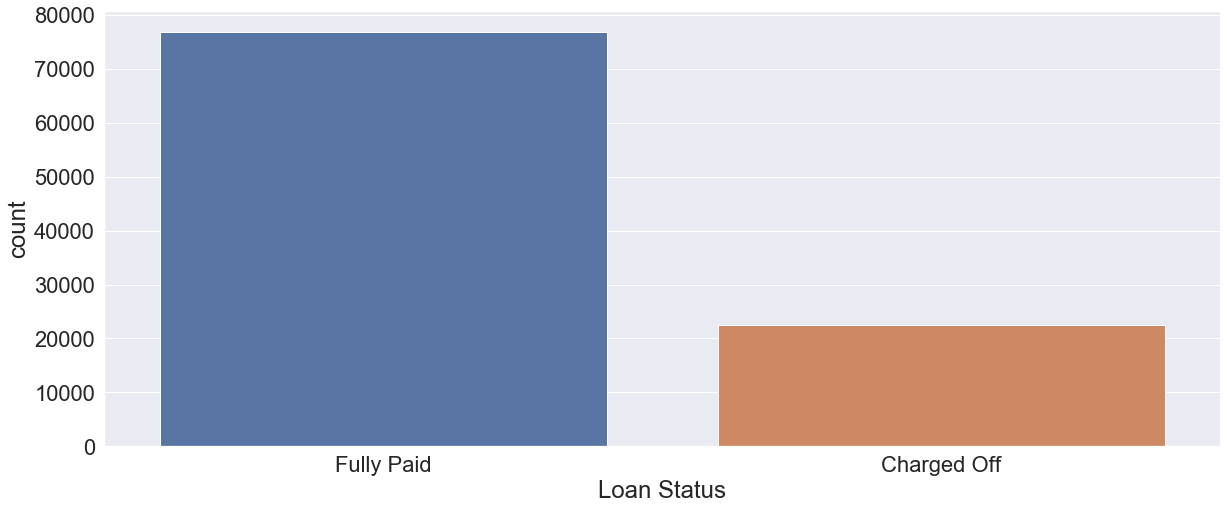

In [23]:
plt.figure(figsize=(20,8))

sns.countplot(df['Loan Status'])

# Machine learning

In [24]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = df.drop(columns='Loan Status')
targets = pd.DataFrame(df['Loan Status'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

In [25]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# X_resampled, y_resampled = SMOTE().fit_resample(features, targets)
# X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42)
# print(sorted(Counter(y_resampled).items()))

In [26]:
# plt.figure(figsize=(20,8))

# sns.countplot(y_resampled)

In [27]:
y_train


,Loan Status
15410,Charged Off
45156,Fully Paid
55393,Fully Paid
91561,Fully Paid
66047,Fully Paid
...,...
6274,Charged Off
54983,Fully Paid
76967,Fully Paid
860,Charged Off


In [28]:
X_train.dtypes

Current Loan Amount                 int64
Credit Score                      float64
Annual Income                     float64
Monthly Debt                      float64
Years of Credit History           float64
Number of Credit Problems           int64
Maximum Open Credit               float64
Tax Liens                         float64
Term_Long Term                      uint8
Term_Short Term                     uint8
Years in current job_1 year         uint8
Years in current job_10+ years      uint8
Years in current job_2 years        uint8
Years in current job_3 years        uint8
Years in current job_4 years        uint8
Years in current job_5 years        uint8
Years in current job_6 years        uint8
Years in current job_7 years        uint8
Years in current job_8 years        uint8
Years in current job_9 years        uint8
Years in current job_< 1 year       uint8
Home Ownership_3 years              uint8
Home Ownership_Have Mortgage        uint8
Home Ownership_Home Mortgage      

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

# X_train_sample = sc.fit_transform(X_train_sample)
# X_test_sample = sc.transform(X_test_sample)

# y_train_sample = labelencoder_y_train.fit_transform(y_train_sample)
# y_test_sample = labelencoder_y_test.fit_transform(y_test_sample)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
from sklearn.linear_model import LogisticRegression
# Train model
clf_0 = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
pred_y_0 = clf_0.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test, pred_y_0))
print ("Recall score   : ", recall_score(pred_y_0,y_test))
confusion_matrix(y_test, pred_y_0)
print ("classification report :\n",classification_report(pred_y_0,y_test))

Accuracy score :  0.8187342622125231
Recall score   :  0.8103983080719069
classification report :
              precision    recall  f1-score   support

          0       0.21      0.99      0.34      1415
          1       1.00      0.81      0.89     28370

avg / total       0.96      0.82      0.87     29785



In [31]:
clf_rf_s = RandomForestClassifier(n_estimators=40, random_state=21)
clf_rf_s.fit(X_train, y_train)
clf_rf_pred_s= clf_rf_s.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test, clf_rf_pred_s))
print ("Recall score   : ", recall_score(clf_rf_pred_s,y_test))
confusion_matrix(y_test, clf_rf_pred_s)
print ("classification report :\n",classification_report(clf_rf_pred_s,y_test))

Accuracy score :  0.8130602652341783
Recall score   :  0.8170416954451271
classification report :
              precision    recall  f1-score   support

          0       0.26      0.76      0.38      2276
          1       0.98      0.82      0.89     27509

avg / total       0.92      0.81      0.85     29785



In [32]:
# feature_results = pd.DataFrame({'feature': list(features.columns), 
#                                 'importance': gb.feature_importances_})

# # Show the top 10 most important
# feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

# feature_results.head(10)

In [33]:
joblib.dump(gb_s, 'model.pkl')
joblib.dump(sc, 'scaler.pkl')

NameError: name 'joblib' is not defined

In [ ]:
model_columns = list(features.columns)
joblib.dump(model_columns, 'model_columns.pkl')

In [ ]:
json_data = {
        "Current Loan Amount" : 2000000,
        "Term" : "Short Term",
        "Credit Score" : 60,
        "Annual Income" : 100000,
        "Monthly Debt" : 200000,
        "Years of Credit History" : 20,
        "Number of Credit Problems": 7,
        "Years in current job": "1 year",
        "Home Ownership": "Home Mortgage",
        "Purpose": "Small Business",
        "Tax Liens": 4,
        "Maximum Open Credit": 300000
}


In [ ]:
query = pd.DataFrame(json_data , index=[0])
query

In [ ]:
categorical_subset = query[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

categorical_subset = pd.get_dummies(categorical_subset)

query.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
query = pd.concat([query, categorical_subset], axis = 1)
query

In [ ]:
model_cols = joblib.load("model_columns.pkl")
scaler = joblib.load('scaler.pkl')
query = query.reindex(columns=model_columns, fill_value=0)
query = scaler.transform(query)
query

In [ ]:
obj = joblib.load("model.pkl")
prediction = list(obj.predict(query))
prediction

In [ ]:
if prediction[0] == 1:
    risk = "Low Risk"
else:
    risk = "High Risk"
risk